X = T + S + R or X = T * S * R

Trend:
linear regression

Seasonality:
Check de periodicity of the data

Residuals: 
- centered moving averages
- weight moving averages
- ARIMA model

In [1]:
# load data.csv 

import pandas as pd
df = pd.read_csv('data.csv', index_col=0, parse_dates=True)

C:\Users\Manon Lemaire\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\pandas\io\parsers\base_parser.py:1070: UserWarning: Parsing '31/08/2022' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  return tools.to_datetime(
C:\Users\Manon Lemaire\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\pandas\io\parsers\base_parser.py:1070: UserWarning: Parsing '30/08/2022' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  return tools.to_datetime(
C:\Users\Manon Lemaire\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\pandas\io\parsers\base_parser.py:1070: UserWarning: Parsing '29/08/2022' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent pa

In [2]:
df

,day,month,year,cases,deaths,countriesAndTerritories,geoId,countryterritoryCode,popData2020,continentExp
dateRep,,,,,,,,,,
2022-12-09,12,9,2022,4915.0,1.0,Austria,AT,AUT,8901064,Europe
2022-11-09,11,9,2022,2730.0,1.0,Austria,AT,AUT,8901064,Europe
2022-10-09,10,9,2022,3399.0,3.0,Austria,AT,AUT,8901064,Europe
2022-09-09,9,9,2022,4139.0,2.0,Austria,AT,AUT,8901064,Europe
2022-08-09,8,9,2022,4278.0,2.0,Austria,AT,AUT,8901064,Europe
...,...,...,...,...,...,...,...,...,...,...
2020-08-02,8,2,2020,0.0,0.0,Sweden,SE,SWE,10327589,Europe
2020-07-02,7,2,2020,0.0,0.0,Sweden,SE,SWE,10327589,Europe
2020-06-02,6,2,2020,0.0,0.0,Sweden,SE,SWE,10327589,Europe


In [3]:
# select only countriesAndTerritories equals to France 

df_fr = df[df.countriesAndTerritories == 'France']

In [4]:
df_fr

,day,month,year,cases,deaths,countriesAndTerritories,geoId,countryterritoryCode,popData2020,continentExp
dateRep,,,,,,,,,,
2022-09-13,13,9,2022,41850.0,49.0,France,FR,FRA,67320216,Europe
2022-12-09,12,9,2022,4579.0,40.0,France,FR,FRA,67320216,Europe
2022-11-09,11,9,2022,16422.0,6.0,France,FR,FRA,67320216,Europe
2022-10-09,10,9,2022,19517.0,15.0,France,FR,FRA,67320216,Europe
2022-09-09,9,9,2022,19087.0,31.0,France,FR,FRA,67320216,Europe
...,...,...,...,...,...,...,...,...,...,...
2020-01-27,27,1,2020,-3.0,0.0,France,FR,FRA,67320216,Europe
2020-01-26,26,1,2020,0.0,0.0,France,FR,FRA,67320216,Europe
2020-01-25,25,1,2020,0.0,0.0,France,FR,FRA,67320216,Europe


In [5]:
# put dateRed as a column

df_fr = df_fr.reset_index()

In [6]:
# select the dateRep and the cases columns
df_fr_cases = df_fr[['dateRep', 'cases']]

In [7]:
df_fr_cases

,dateRep,cases
0,2022-09-13,41850.0
1,2022-12-09,4579.0
2,2022-11-09,16422.0
3,2022-10-09,19517.0
4,2022-09-09,19087.0
...,...,...
960,2020-01-27,-3.0
961,2020-01-26,0.0
962,2020-01-25,0.0
963,2020-01-24,2.0


In [8]:
# suppres the rows with negative values

df_fr_cases = df_fr_cases[df_fr_cases.cases >= 0]


In [9]:
# sort the date 

df_fr_cases = df_fr_cases.sort_values(by='dateRep')


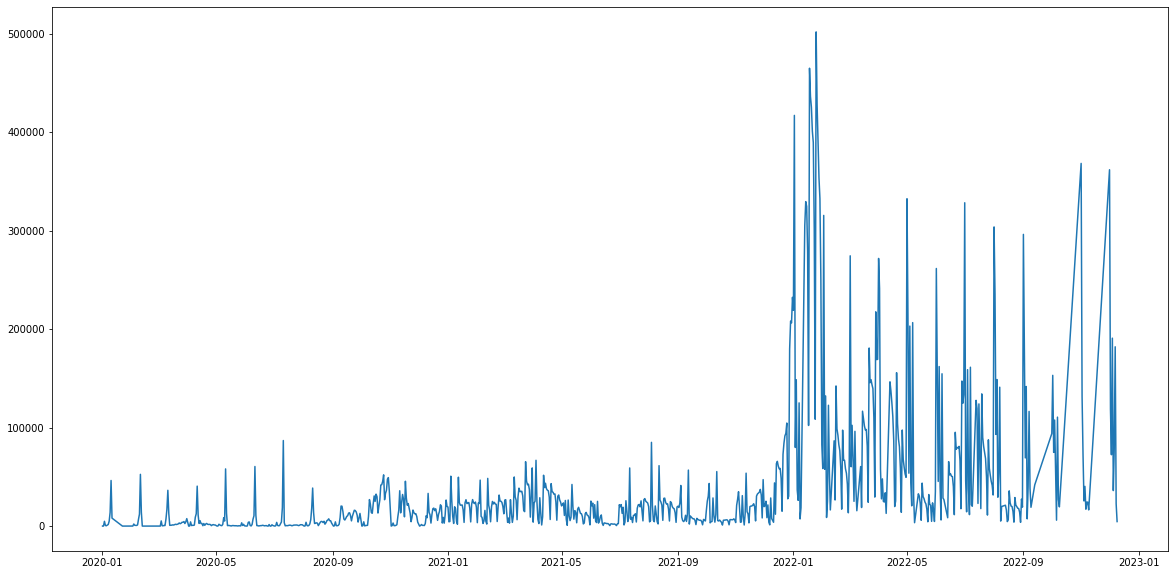

In [10]:
import matplotlib.pyplot as plt

# plot  line the df_fr_cases
plt.figure(figsize=(20,10))


plt.plot(df_fr_cases.dateRep, df_fr_cases.cases)
plt.show()



In [11]:
# resampling to have weekly data 

df_fr_cases_weekly = df_fr_cases.resample('W', on='dateRep').sum()


In [12]:
df_fr_cases_weekly


,cases
dateRep,
2020-01-05,5510.0
2020-01-12,76209.0
2020-01-19,0.0
2020-01-26,3.0
2020-02-02,6.0
...,...
2022-11-13,65077.0
2022-11-20,0.0
2022-11-27,0.0


In [13]:
print("",df_fr_cases.dateRep.min(),df_fr_cases.dateRep.max())

 2020-01-02 00:00:00 2022-12-09 00:00:00


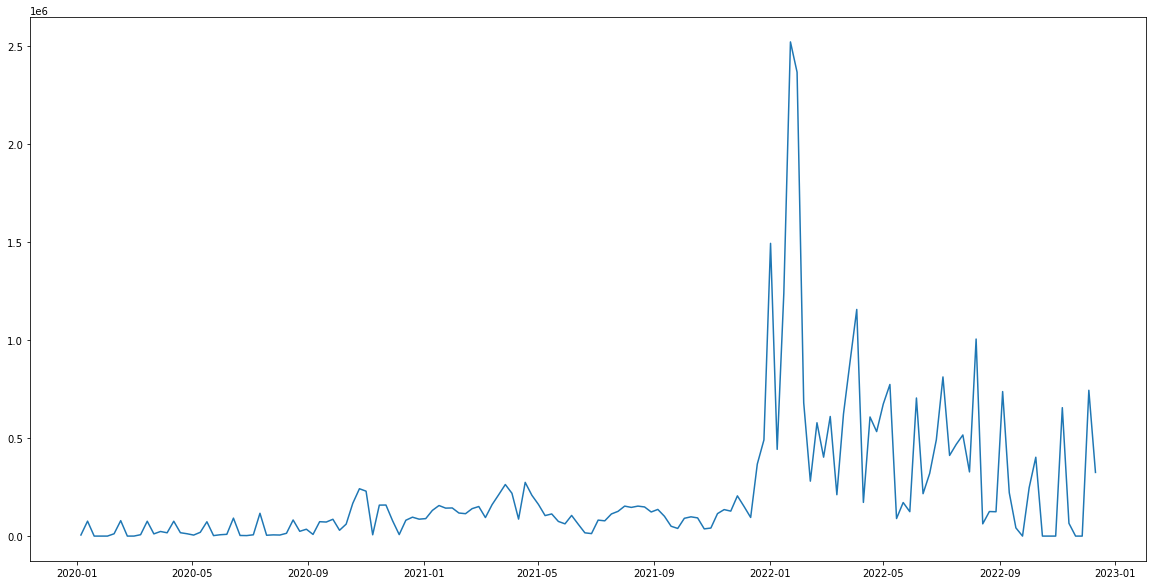

In [14]:
# plot  line the df_fr_cases_weekly in a larger windows 

plt.figure(figsize=(20,10))


plt.plot(df_fr_cases_weekly.index, df_fr_cases_weekly.cases)
plt.show()


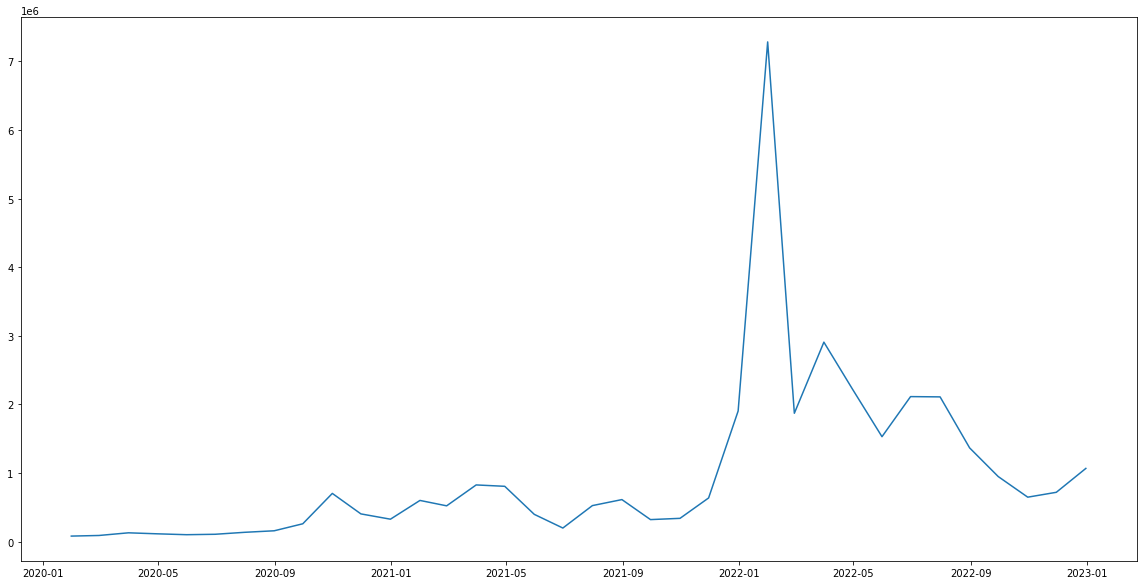

In [15]:
# resampling to have monthly data and plot 
plt.figure(figsize=(20,10))

df_fr_cases_monthly = df_fr_cases.resample('M', on='dateRep').sum()

plt.plot(df_fr_cases_monthly.index, df_fr_cases_monthly.cases)
plt.show()

In [16]:
df_fr['dateRep']

0     2022-09-13
1     2022-12-09
2     2022-11-09
3     2022-10-09
4     2022-09-09
         ...    
960   2020-01-27
961   2020-01-26
962   2020-01-25
963   2020-01-24
964   2020-01-23
Name: dateRep, Length: 965, dtype: datetime64[ns]

In [20]:
fig, axes = plt.subplots(1,3, figsize=(20,4), dpi=100)
pd.read_csv('data.csv', parse_dates=['dateRep'], index_col='dateRep').plot(title='Trend Only', legend=False, ax=axes[0])

pd.read_csv('data.csv', parse_dates=['dateRep'], index_col='dateRep').plot(title='Seasonality Only', legend=False, ax=axes[1])

pd.read_csv('data.csv', parse_dates=['dateRep'], index_col='dateRep').plot(title='Trend and Seasonality', legend=False, ax=axes[2])

<AxesSubplot:title={'center':'Trend Only'}>

ValueError: Date ordinal -3732299.1 converts to -8249-04-24T21:36:00.000000 (using epoch 1970-01-01T00:00:00), but Matplotlib dates must be between year 0001 and 9999.

# Xt = Rt

### Moving average and exponential moving average

In [ ]:
# moving average

df_fr_cases['moving_average'] = df_fr_cases.cases.rolling(window=7).mean()

# exponential moving average

df_fr_cases['exp_moving_average'] = df_fr_cases.cases.ewm(span=7).mean()

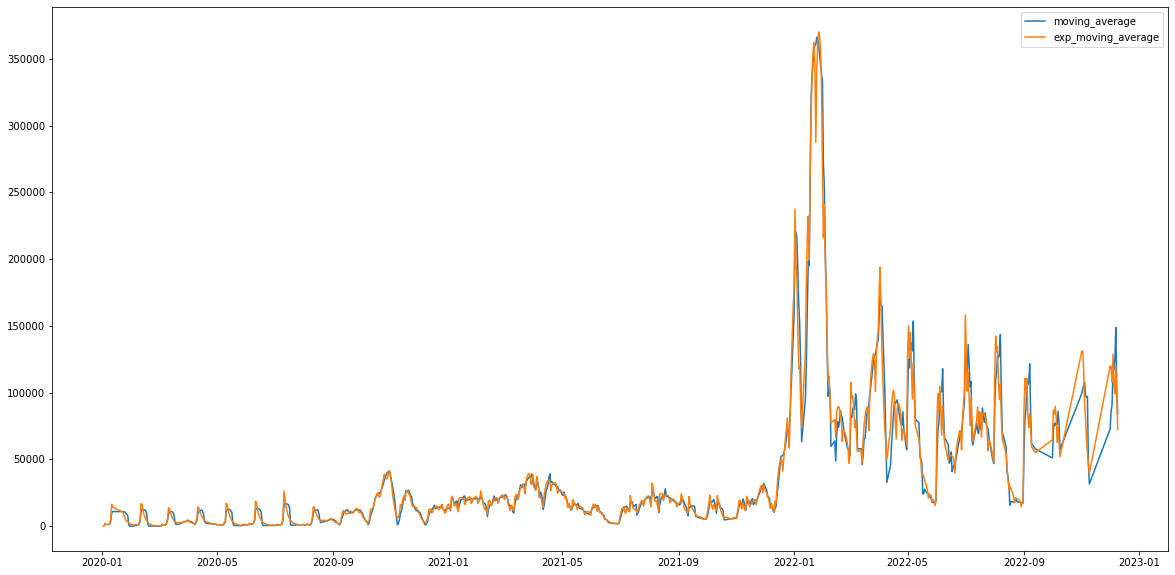

In [ ]:
# plot the moving averages and the exp_moving_average

plt.figure(figsize=(20,10))

plt.plot(df_fr_cases.dateRep, df_fr_cases.moving_average, label='moving_average')

plt.plot(df_fr_cases.dateRep, df_fr_cases.exp_moving_average, label='exp_moving_average')

plt.legend()    

plt.show()

In [ ]:
# https://www.statsmodels.org/stable/generated/statsmodels.tsa.holtwinters.ExponentialSmoothing.html#statsmodels.tsa.holtwinters.ExponentialSmoothing*

In [ ]:
# seasonal decomposition 

# https://www.statsmodels.org/dev/generated/statsmodels.tsa.seasonal.seasonal_decompose.html


from statsmodels.tsa.seasonal import seasonal_decompose

# converting timestamp to float

df_fr_cases['dateRep'] = df_fr_cases['dateRep'].float()


seasonal_decompose(df_fr_cases, model='additive').plot()

AttributeError: 'Series' object has no attribute 'float'

C:\Users\Manon Lemaire\AppData\Local\Temp\ipykernel_11528\3237849482.py:11: FutureWarning: Dropping of nuisance columns in rolling operations is deprecated; in a future version this will raise TypeError. Select only valid columns before calling the operation. Dropped columns were Index(['dateRep'], dtype='object')
  rolling_mean = df_fr_cases.rolling(window = 12).mean()
C:\Users\Manon Lemaire\AppData\Local\Temp\ipykernel_11528\3237849482.py:12: FutureWarning: Dropping of nuisance columns in rolling operations is deprecated; in a future version this will raise TypeError. Select only valid columns before calling the operation. Dropped columns were Index(['dateRep'], dtype='object')
  rolling_std = df_fr_cases.rolling(window = 12).std()


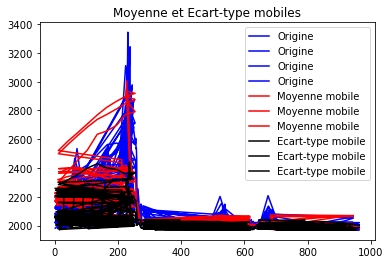

In [ ]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.arima_model import ARIMA
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()


rolling_mean = df_fr_cases.rolling(window = 12).mean()
rolling_std = df_fr_cases.rolling(window = 12).std()
plt.plot(df_fr_cases, color = 'blue', label = 'Origine')
plt.plot(rolling_mean, color = 'red', label = 'Moyenne mobile')
plt.plot(rolling_std, color = 'black', label = 'Ecart-type mobile')
plt.legend(loc = 'best')
plt.title('Moyenne et Ecart-type mobiles')
plt.show()